In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


In [2]:
df = pandas.read_csv("./average_temps_by_run_by_calo.csv",index_col=0)

In [3]:
df.head()

,calo,run,avgtemp
0,1,15921,38.807412
1,1,15922,38.852164
2,1,15923,38.906977
3,1,15924,38.959471
4,1,15925,38.986003


In [4]:
df1 = df.loc[df['calo'] == 1]

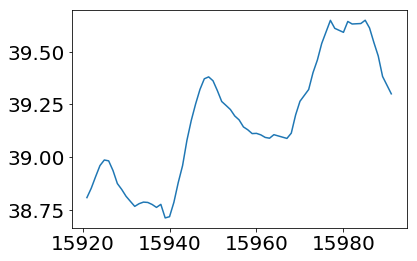

In [5]:
plt.plot(df1['run'],df1['avgtemp'])
plt.show()

In [6]:
runlist = list(df1['run'])

---

### Now lets get the calo1 positrons

In [48]:
f = r.TFile("./Energy_v_Time_KS_60h.root")
#f = r.TFile("../eastVsWest/60hUnblindingWorkshop/time_gt_0_positrons_v9_17_01_full_calo1.root")
f.ls()

TFile**		./Energy_v_Time_KS_60h.root	
 TFile*		./Energy_v_Time_KS_60h.root	
  KEY: TCanvas	c1;1	c1


In [49]:
cf2 = f.Get("c1")
print([x for x in cf2.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fffdc711310>, <ROOT.TH2D object ("h") at 0x7fffdc1e40f0>, <ROOT.TPaveText object ("title") at 0x7fffdc832e70>]


In [50]:
hp = cf2.GetPrimitive("h").Clone()

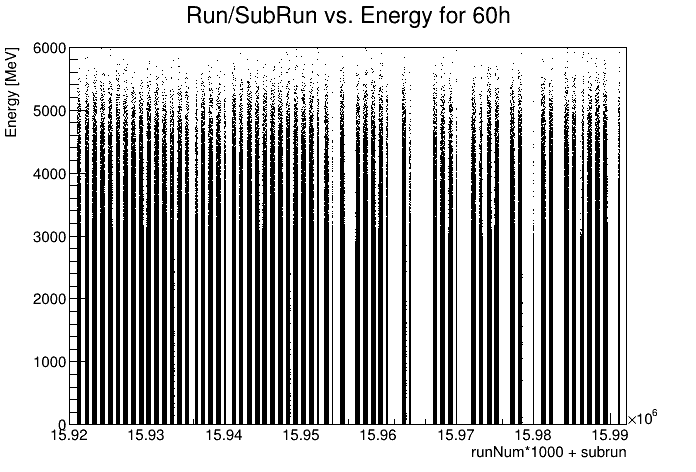

In [51]:
c = r.TCanvas()
hp.Draw()
c.Draw()

In [66]:
hp.Rebin2D(100,1)

<ROOT.TH2D object ("h") at 0x7fffdba593f0>

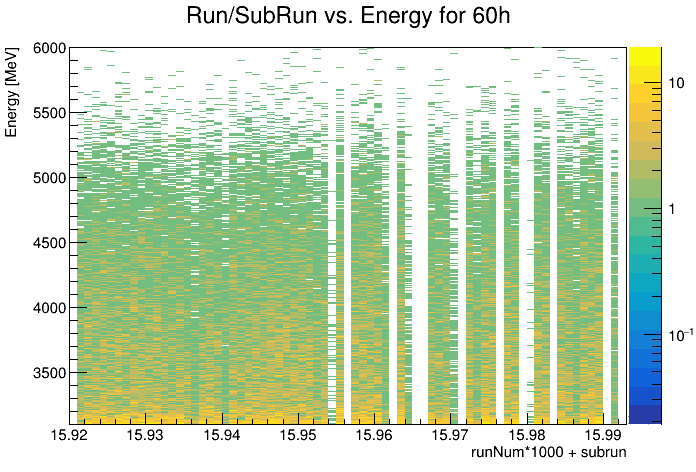

In [67]:
c = r.TCanvas()
hp.GetYaxis().SetRangeUser(3100,6000)
hp.GetXaxis().SetRangeUser(15920000,15995000)
hp.Draw("colz")
c.SetLogz()
c.Draw()

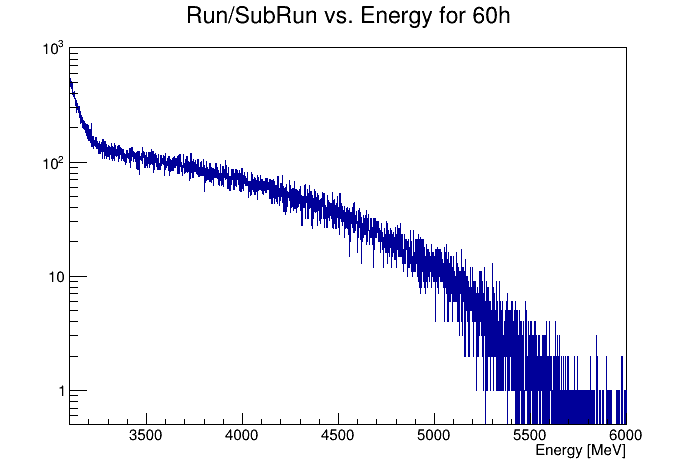

In [68]:
c = r.TCanvas()
hp.ProjectionY().Draw()
c.SetLogy()
c.Draw()

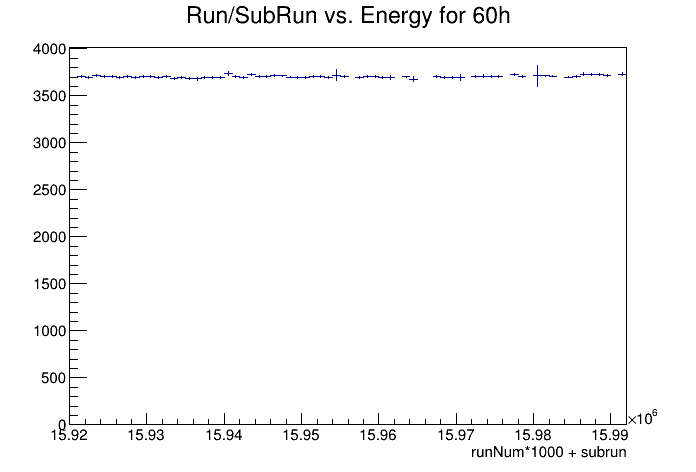

In [69]:
c = r.TCanvas()
hp.GetYaxis().SetRangeUser(3100,6000)
hp.GetXaxis().SetRangeUser(15920000,15995000)

hpx = hp.ProfileX().Clone()
#hpx = hp.ProjectionX().Clone()
hpx.Draw()
c.SetLogz()
c.Draw()

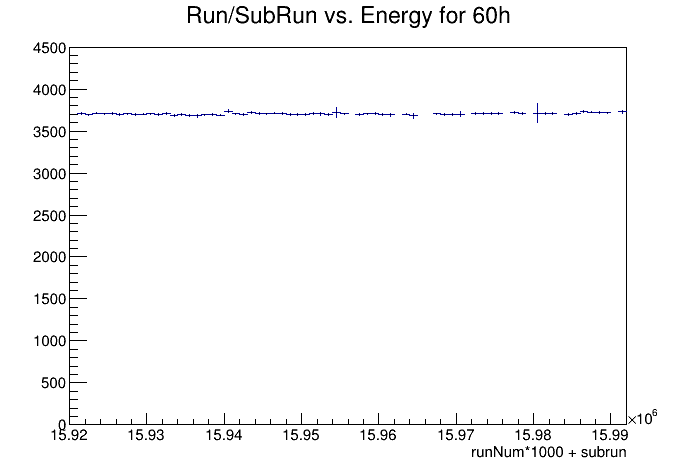

In [70]:
c = r.TCanvas()
hpx.GetYaxis().SetRangeUser(0,4500)
hpx.Draw()
c.SetLogz()
c.Draw()

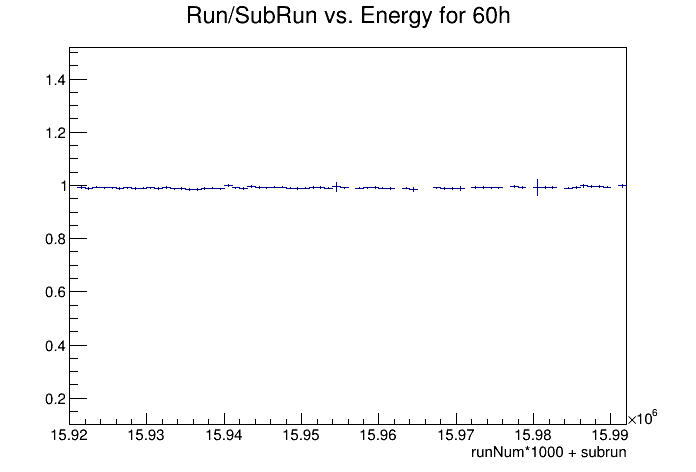

In [71]:
c = r.TCanvas()
hpx_scaled = hpx.Clone()
hpx_scaled.Scale(1/(hpx.GetBinContent(hpx.GetMaximumBin())))
hpx_scaled.GetYaxis().SetRangeUser(0.1,1.52)
hpx_scaled.Draw()
c.SetLogz()
c.Draw()

In [72]:
ht = r.TH1D("ht","Temperatures during 60h",72, 15920000, 15992000)
gt = r.TGraph()
gt_scaled = r.TGraph()
for i, row in df1.iterrows():
    #print(i, row['run'], row['avgtemp'])
    ht.SetBinContent(ht.FindBin(row['run']*1000),row['avgtemp'])
    gt.SetPoint(i,row['run']*1000, row['avgtemp'])
    gt_scaled.SetPoint(i,row['run']*1000, row['avgtemp']/(np.max(df1['avgtemp'])))

Warning in <TFile::Append>: Replacing existing TH1: ht (Potential memory leak).


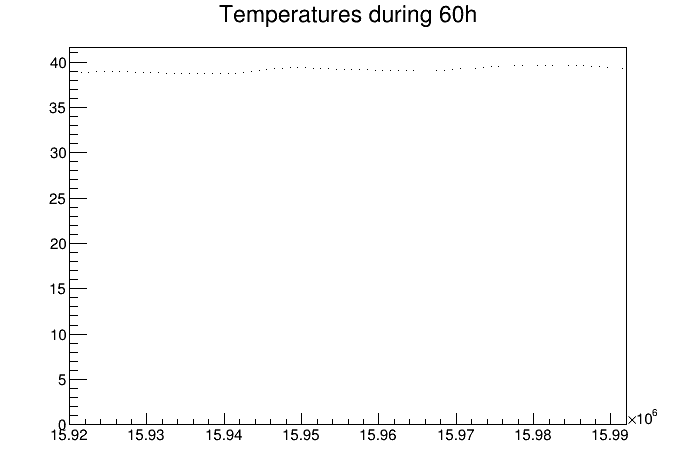

In [73]:
c = r.TCanvas()
ht.Draw("p")
c.Draw()

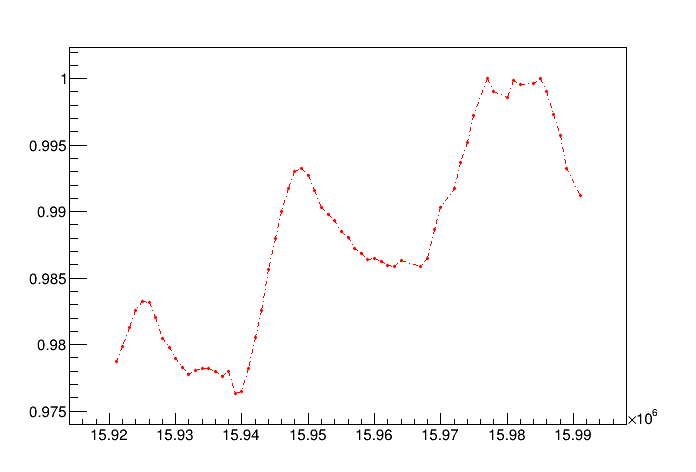

In [74]:
c = r.TCanvas()
gt_scaled.SetMarkerStyle(8)
gt_scaled.SetMarkerSize(0.25)
gt_scaled.SetLineColor(2)
gt_scaled.SetLineStyle(5)
gt_scaled.SetMarkerColor(2)
gt_scaled.Draw("apl")
c.Draw()

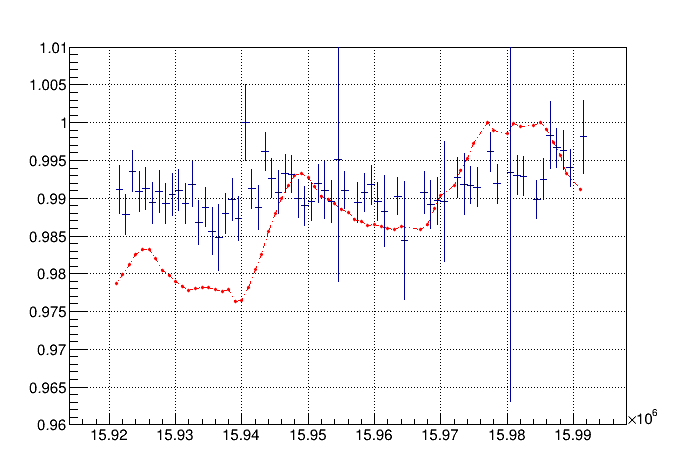

In [75]:
c = r.TCanvas()
gt_scaled.Draw()
gt_scaled.GetYaxis().SetRangeUser(0.96,1.01)
hpx_scaled.Draw("SAME")
c.SetLogz()
c.SetGrid()
c.Draw()

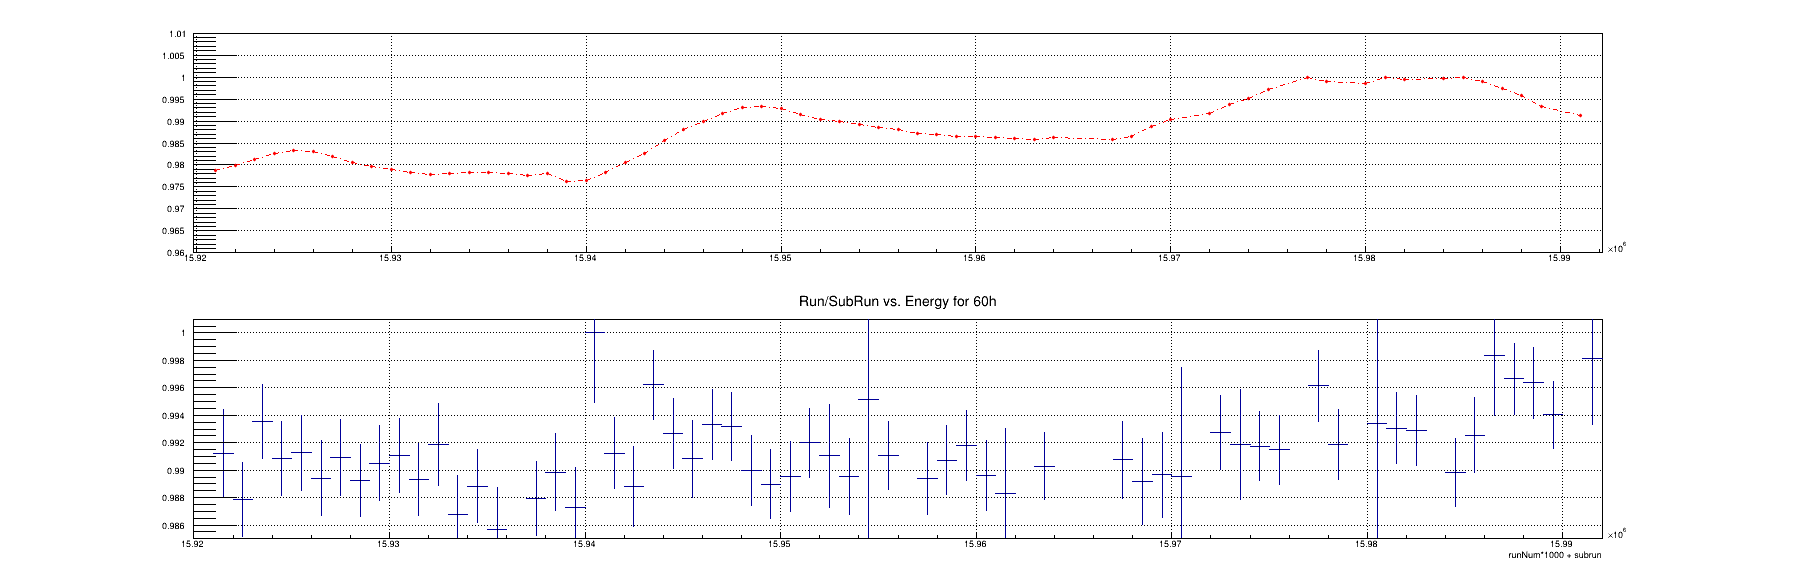

In [76]:
c = r.TCanvas("c","c",1800,600)
c.Divide(1,2)
c.cd(1)
gt_scaled.Draw()
gt_scaled.GetXaxis().SetRangeUser(15920000, 15992000)
r.gPad.SetGrid()
c.cd(2)
hpx_scaled.Draw()
hpx_scaled.GetYaxis().SetRangeUser(0.985,1.001)
r.gPad.SetGrid()
c.Draw()

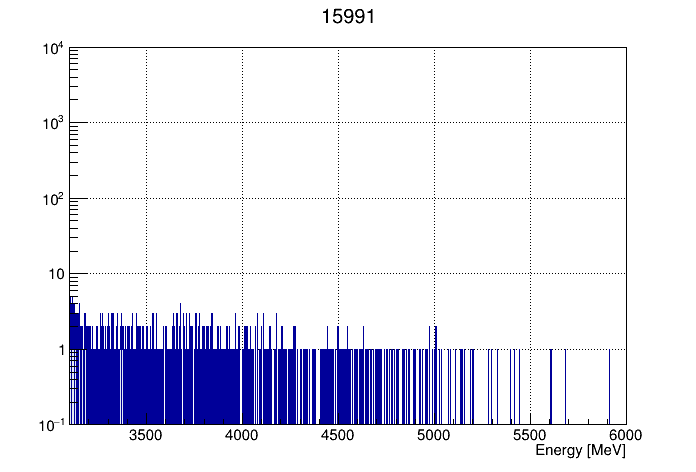

In [77]:
pileupmean = []
c = r.TCanvas()
for run in runlist:
    hp.GetXaxis().SetRangeUser(run*1000,(run+1)*1000)
    hi = hp.ProjectionY().Clone()
    hi.SetTitle(str(run))
    hi.GetYaxis().SetRangeUser(0.1,10000)
    hi.SetFillColorAlpha(38,0.2)
    hi.Draw()
    #print(hi.GetMean())
    pileupmean.append(hi.GetMean())
    c.SetLogy()
    c.Draw()
    c.SetGrid()
    #c.Print("./images/mean_energy_run_"+str(int(run))+".png")

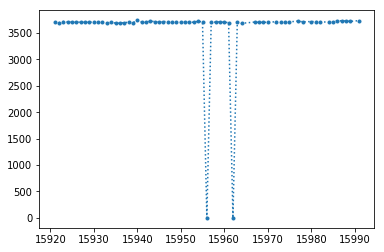

In [78]:
plt.plot(runlist,pileupmean,".:")
#plt.ylim(0,3750)
plt.show()

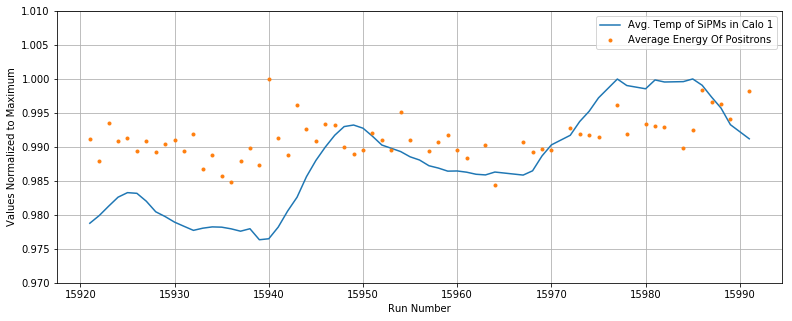

In [79]:
setint()
fig, ax = plt.subplots(figsize=(13,5))
plt.plot(df1['run'],df1['avgtemp']/np.max(df1['avgtemp']),label='Avg. Temp of SiPMs in Calo 1')
plt.plot(runlist,[x/np.max(pileupmean) for x in pileupmean],".", label='Average Energy Of Positrons')
plt.xlabel("Run Number")
plt.ylabel("Values Normalized to Maximum")
plt.ylim(0.97,1.01)
plt.grid()
plt.legend()
plt.show()

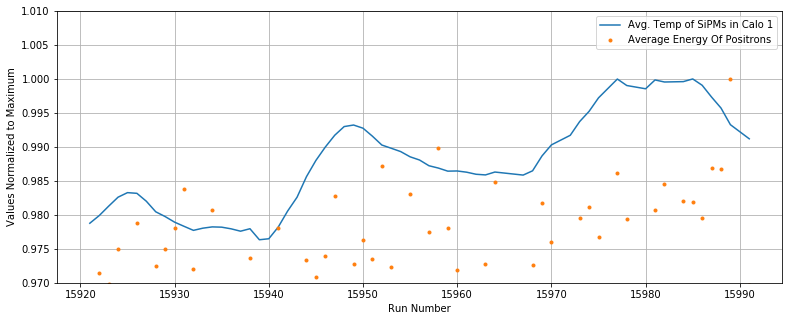

In [46]:
setint()
fig, ax = plt.subplots(figsize=(13,5))
plt.plot(df1['run'],df1['avgtemp']/np.max(df1['avgtemp']),label='Avg. Temp of SiPMs in Calo 1')
plt.plot(runlist,[x/np.max(pileupmean) for x in pileupmean],".", label='Average Energy Of Positrons')
plt.xlabel("Run Number")
plt.ylabel("Values Normalized to Maximum")
plt.ylim(0.97,1.01)
plt.grid()
plt.legend()
plt.show()

---

### Can we set up a KS test to determine which energy ranges are most likely effected by the temperature change

In [82]:
ksvec = []
energyvec = []
energybin = 500
for energy in range(0,6000,energybin):
    hp.GetYaxis().SetRangeUser(energy, energy+energybin)
    hp.GetXaxis().SetRangeUser(15920000,15995000)

    hpx = hp.ProfileX().Clone()
    ksi = hpx.KolmogorovTest(ht)
    ksvec.append(ksi)
    energyvec.append(energy)

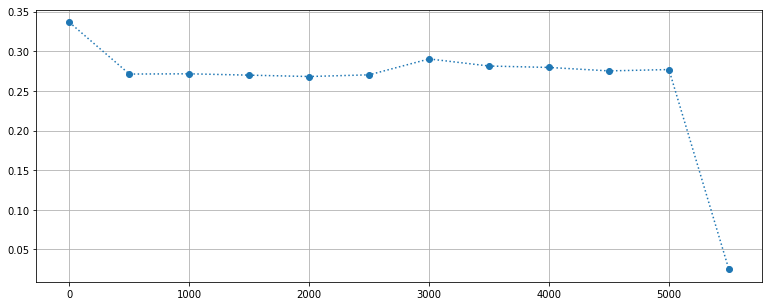

In [83]:
fig,ax = plt.subplots(figsize=(13,5))
plt.plot(energyvec,ksvec,":o")
plt.grid()
plt.show()